### CSAT Sentiment Analysis
- A breakdown of CS survey responses and how specific words could be an indicator of a larger trend
    - Data is pulled from Wootric (sfdc.wootric_response_c) survery responses going back to December 2018. The following analysis looks at each text response given in the CSAT surveys. The given text can be a strong indicator as to whether the score will positive or negative. From there, we map out word frequency over time and layer in major Customer Service operational changes. This data should help us identify strengths and weaknesses as well as areas where we should focus should focus our time given the trimmed team.

In [52]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

#pulled from https://spothero.looker.com/explore/customer_heroes/service_cloud_case?qid=cQP6UQC1liVtmvqkPzLedJ&toggle=fil
csat_scores = pd.read_csv('csat_scores_full_20210325.csv')
csat_scores.head()

,Wootric (CSAT & NPS) ID,Wootric (CSAT & NPS) Created Date,Wootric (CSAT & NPS) Created Year,Wootric (CSAT & NPS) Created Month,Wootric (CSAT & NPS) Score,Wootric (CSAT & NPS) Survey Feedback,Sfdc Case Contact Origin Aggregated,Sfdc Case Tag,Sfdc Case Tag Category,Hero Tags Is Product Contact? (Yes / No),Hero Tags Is Supply Issue? (Yes / No),Rental Reservation Status
0,a3S3o000002JfwZEAS,3/25/2021,2021,2021-03,1,"The parking spot wasn't there, so I had to fin...",Inbound Call,Redemption,User Error,No,No,valid
1,a3S3o000002JfvbEAC,3/25/2021,2021,2021-03,5,Very friendly and prompt service,Inbound Call,Vehicle Details,Reservation Actions,Yes,No,valid
2,a3S3o000002JfvvEAC,3/25/2021,2021,2021-03,3,"The rep was lovely, but she saw a different pr...",Inbound Call,Not Accepted,Attendant,No,Yes,cancelled
3,a3S3o000002JfwtEAC,3/25/2021,2021,2021-03,5,extremely responsive,Email,Wrong Number,Other,No,No,NaN
4,a3S3o000002Jfx3EAC,3/25/2021,2021,2021-03,5,Representative was polite and efficient in dea...,Inbound Call,Lot Full,Facility,No,Yes,cancelled


In [53]:
column_rename = {
    'Wootric (CSAT & NPS) ID':'id',
    'Wootric (CSAT & NPS) Created Date':'date',
    'Wootric (CSAT & NPS) Created Year':'year',
    'Wootric (CSAT & NPS) Created Month':'year_month',
    'Wootric (CSAT & NPS) Score':'score',
    'Wootric (CSAT & NPS) Survey Feedback ':'text',
    'Sfdc Case Contact Origin Aggregated':'origin',
    'Sfdc Case Tag':'tag',
    'Sfdc Case Tag Category':'category',
    'Hero Tags Is Product Contact? (Yes / No)':'product_contact',
    'Hero Tags Is Supply Issue? (Yes / No)':'supply_contact',
    'Rental Reservation Status':'rental_status'
}

csat_scores.rename(mapper=column_rename, axis=1, inplace=True)
print (csat_scores.columns)

Index(['id', 'date', 'year', 'year_month', 'score', 'text', 'origin', 'tag',
       'category', 'product_contact', 'supply_contact', 'rental_status'],
      dtype='object')


In [54]:
csat_scores['date'] = pd.to_datetime(csat_scores['date'])
csat_scores['year_month'] = csat_scores['date'].dt.strftime('%Y-%m')
csat_scores['year'] = csat_scores['date'].dt.strftime('%Y')
csat_scores.head()

,id,date,year,year_month,score,text,origin,tag,category,product_contact,supply_contact,rental_status
0,a3S3o000002JfwZEAS,2021-03-25,2021,2021-03,1,"The parking spot wasn't there, so I had to fin...",Inbound Call,Redemption,User Error,No,No,valid
1,a3S3o000002JfvbEAC,2021-03-25,2021,2021-03,5,Very friendly and prompt service,Inbound Call,Vehicle Details,Reservation Actions,Yes,No,valid
2,a3S3o000002JfvvEAC,2021-03-25,2021,2021-03,3,"The rep was lovely, but she saw a different pr...",Inbound Call,Not Accepted,Attendant,No,Yes,cancelled
3,a3S3o000002JfwtEAC,2021-03-25,2021,2021-03,5,extremely responsive,Email,Wrong Number,Other,No,No,NaN
4,a3S3o000002Jfx3EAC,2021-03-25,2021,2021-03,5,Representative was polite and efficient in dea...,Inbound Call,Lot Full,Facility,No,Yes,cancelled


In [55]:
yes_no_cols = [9,10]
yes_no = {"Yes": True,
          "No": False}
for i in yes_no_cols:
    csat_scores[csat_scores.columns[i]] = csat_scores[csat_scores.columns[i]].map(yes_no)
    print (csat_scores[csat_scores.columns[i]].value_counts(dropna=False))
    print('\n')

False    52120
True     15268
Name: product_contact, dtype: int64


False    50532
True     16856
Name: supply_contact, dtype: int64




In [56]:
csat_scores['rental_status'] = csat_scores['rental_status'].replace(np.nan,'None')
csat_scores.head()

,id,date,year,year_month,score,text,origin,tag,category,product_contact,supply_contact,rental_status
0,a3S3o000002JfwZEAS,2021-03-25,2021,2021-03,1,"The parking spot wasn't there, so I had to fin...",Inbound Call,Redemption,User Error,False,False,valid
1,a3S3o000002JfvbEAC,2021-03-25,2021,2021-03,5,Very friendly and prompt service,Inbound Call,Vehicle Details,Reservation Actions,True,False,valid
2,a3S3o000002JfvvEAC,2021-03-25,2021,2021-03,3,"The rep was lovely, but she saw a different pr...",Inbound Call,Not Accepted,Attendant,False,True,cancelled
3,a3S3o000002JfwtEAC,2021-03-25,2021,2021-03,5,extremely responsive,Email,Wrong Number,Other,False,False,None
4,a3S3o000002Jfx3EAC,2021-03-25,2021,2021-03,5,Representative was polite and efficient in dea...,Inbound Call,Lot Full,Facility,False,True,cancelled


In [57]:
csat_scores = csat_scores.dropna()
csat_scores.isnull().sum()

id                 0
date               0
year               0
year_month         0
score              0
text               0
origin             0
tag                0
category           0
product_contact    0
supply_contact     0
rental_status      0
dtype: int64

In [26]:
csat_scores.shape

(67378, 12)

Nearly 75% of all reviews have been associated with CSAT score of 5

In [27]:
import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.express as px

fig = px.histogram(csat_scores, x='score')
fig.update_traces(marker_color="turquoise",marker_line_color='rgb(8,48,107)',
                  marker_line_width=1.5)
fig.update_layout(title_text='CSAT Score')
fig.show()

CSAT reviews went down dramatically in 2020 due to COVID. Review volume was down ~75% year over year


Text(0.5,1.07,'Review Count by Year')

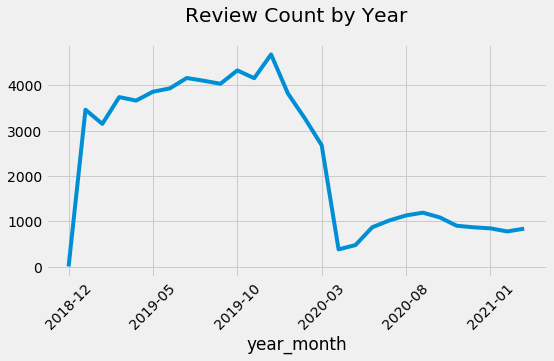

In [28]:
csat_sum = csat_scores.groupby('year_month')['text'].count()
csat_sum.plot.line('text','year_month',rot=45,figsize = (8,4))
plt.title("Review Count by Year",
          y = 1.07)

While volume is much lower, the overall density of scores is comparable. Scores of 5 and 1 make up the vast majority of reviews, but in 2020, scores of 5 dipped in relative volume

Overall score average has dropped at or below 4 for the past few months. Score average didn't drop below 4 throughout all of 2019

Text(0.5,1.07,'Average Score by Month')

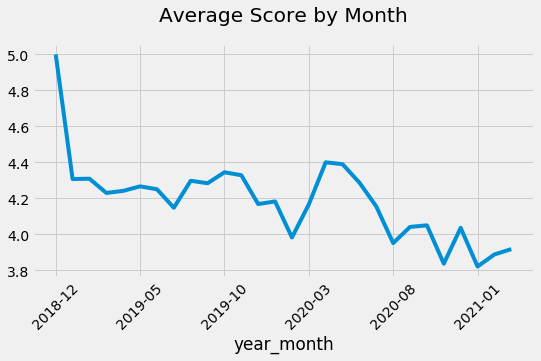

In [29]:
csat_scores_avgs = csat_scores[['score','year_month']]
csat_scores_avgs = csat_scores.groupby('year_month')['score'].mean()
csat_scores_avgs.plot.line('score','year_month',rot=45,figsize=(8,4))
plt.title("Average Score by Month",
          y = 1.07)

In [30]:
csat_origin = csat_scores[csat_scores['origin'].isin(['Inbound Call', 'Email'])]

In [86]:
pd.options.display.max_colwidth = 100

In [87]:
csat_email = csat_origin[(csat_origin['origin']=='Email') & (csat_origin['score'] < 3)]
email_top_negative = csat_email[csat_email['text'].str.contains('still', regex=False)]
print(email_top_negative['text'][:10])

16      I emailed you March 1st, 3 wks ago and still haven't had a resolution.\nI sent a screenshot Marc...
602                                                   Terrible customer service still waiting for my refund
721     I still haven’t heard back about issuing a refund for a double booking and change from end of Fe...
1335    I am still waiting for a response from them after sending them the receipt I was required to pre...
1782    I do not feel that this was resolved still. It also took a week and a half of sending the same i...
1993    I choose spothero for it saves money on parking. Now I have to pay full price because of system ...
2283    11 days after I have been asked to submit a receipt of the payment I made at a parking garage I ...
2355                                    Waited on hold for 10 mins hung up still waiting to be emailed back
2628    I spent 5 days emailing back and forth with customer service, and then followed up with a phone ...
2683                        

C:\Users\Jimmy Reagan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.

C:\Users\Jimmy Reagan\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



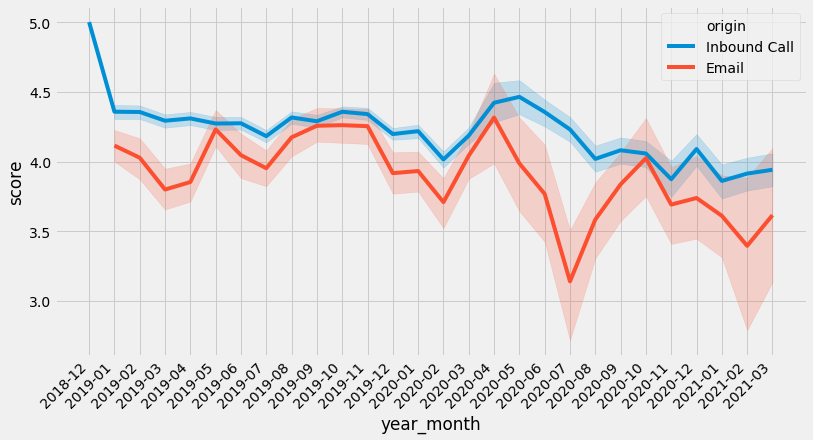

In [31]:
xlabels = ['2018-12','2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12','2020-01','2020-02','2020-03','2020-04','2020-05','2020-06','2020-07','2020-08','2020-09','2020-10','2020-11','2020-12','2021-01','2021-02','2021-03']
plt.figure(figsize=(12, 6))
origin_chart = sns.lineplot(data=csat_origin, x='year_month', y='score', hue='origin')
origin_chart.set_xticklabels(xlabels, rotation=45, horizontalalignment='right')
plt.show()

In [32]:
csat_tag = csat_scores[csat_scores['category'].isin(['User Error','Facility','Customer Questions','Reservation Actions'])]
csat_tag = csat_tag[csat_tag['tag'].map(csat_tag['tag'].value_counts()) > 4400]
csat_tag['tag'].value_counts()

Change of Plans       8072
Lot Full              5943
Redemption Issue      5444
Redemption            4541
Change Date / Time    4474
Name: tag, dtype: int64

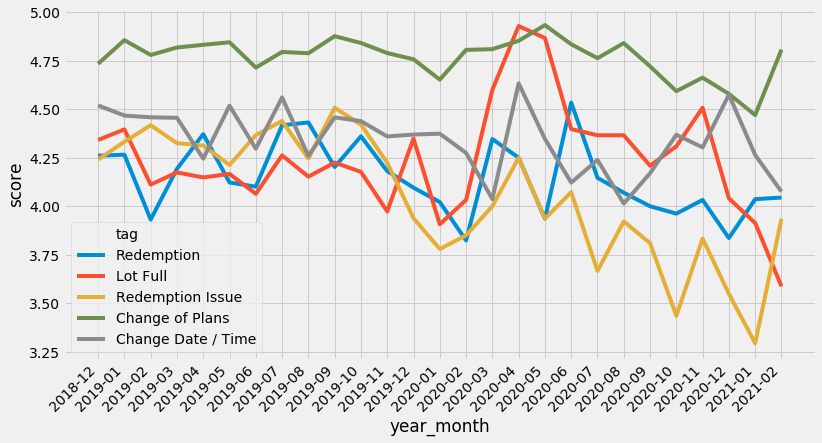

In [33]:
plt.figure(figsize=(12, 6))
tag_chart = sns.lineplot(data=csat_tag, x='year_month', y='score', hue='tag',ci=None)
tag_chart.set_xticklabels(xlabels, rotation=45, horizontalalignment='right')
plt.show()

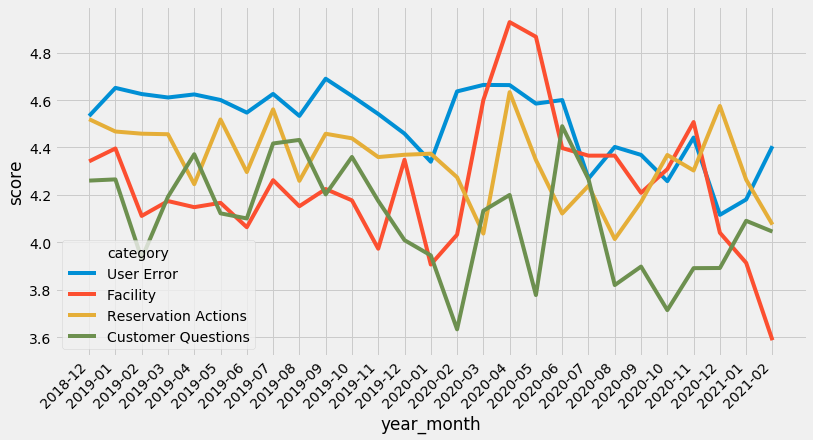

In [34]:
plt.figure(figsize=(12, 6))
category_chart = sns.lineplot(data=csat_tag, x='year_month', y='score', hue='category',ci=None)
category_chart.set_xticklabels(xlabels, rotation=45, horizontalalignment='right')
plt.show()

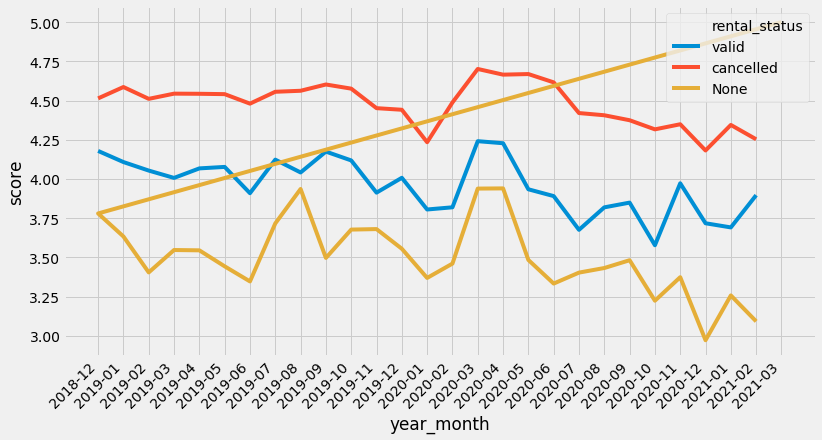

In [35]:
plt.figure(figsize=(12, 6))
status_chart1 = sns.lineplot(data=csat_scores, x='year_month', y='score',hue='rental_status',ci=None)
status_chart1.set_xticklabels(xlabels, rotation=45, horizontalalignment='right')
plt.show()

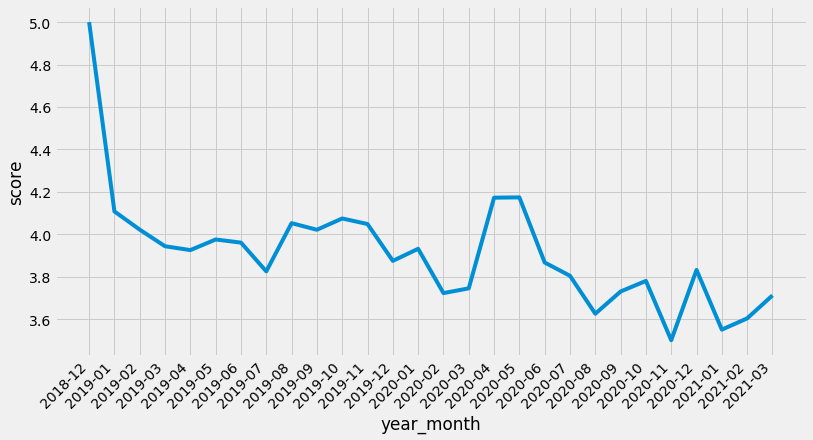

In [58]:
csat_no_cancel = csat_scores[csat_scores['rental_status'].isin(['valid','None'])]
plt.figure(figsize=(12, 6))
status_chart2 = sns.lineplot(data=csat_no_cancel, x='year_month', y='score',ci=None)
status_chart2.set_xticklabels(xlabels, rotation=45, horizontalalignment='right')
plt.show()

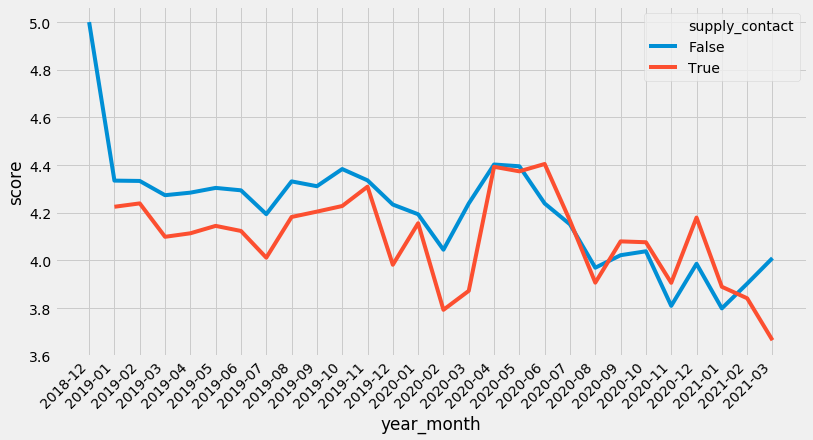

In [37]:
plt.figure(figsize=(12, 6))
supply_chart = sns.lineplot(data=csat_scores, x='year_month', y='score',hue='supply_contact',ci=None)
supply_chart.set_xticklabels(xlabels, rotation=45, horizontalalignment='right')
plt.show()

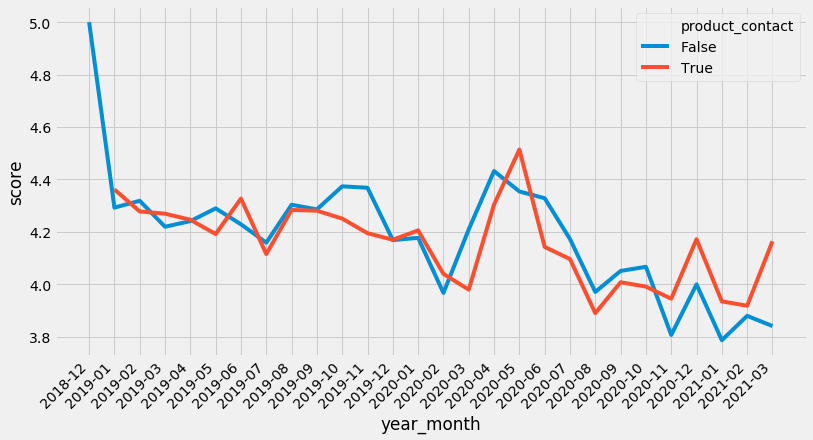

In [88]:
plt.figure(figsize=(12, 6))
supply_chart = sns.lineplot(data=csat_scores, x='year_month', y='score',hue='product_contact',ci=None)
supply_chart.set_xticklabels(xlabels, rotation=45, horizontalalignment='right')
plt.show()

In [59]:
from collections import Counter
import re, string
import nltk
from nltk import FreqDist
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
stops = set(stopwords.words('english'))


def positive_negative_list(df):
    df = df[df['score'] != 3]
    df['sentiment'] = df['score'].apply(lambda score: +1 if score > 3 else -1)
    positive = df[df['sentiment'] == 1]
    negative = df[df['sentiment'] == -1]
    positive = positive['text'].to_list()
    negative = negative['text'].to_list()
    #Sort through words in each list, remove stop words, append everything else to new list
    positive_without_stops = []
    negative_without_stops = []
    
    for i in range(len(positive)):
        for word in str(positive[i]).lower().split(" "): 
            if word not in stops:
                positive_without_stops.append(word)
    for i in range(len(negative)):
        for word in str(negative[i]).lower().split(" "): 
            if word not in stops:
                negative_without_stops.append(word)
                
    return positive_negative_counter(positive_without_stops, negative_without_stops)

def positive_negative_counter(positive_without_stops,negative_without_stops):
    #set blank count variables, add words from positive and negative reviews to counters, pull top words
    positive_counts = Counter()
    negative_counts = Counter()
    total_counts = Counter()
    for i in range(len(positive_without_stops)):
        for word in str(positive_without_stops[i]).lower().split(" "):
            positive_counts[word]+=1
            total_counts[word]+=1
    for i in range(len(negative_without_stops)):
        for word in str(negative_without_stops[i]).lower().split(" "):
            negative_counts[word]+=1
            total_counts[word]+=1
        
    pos_neg_ratios = Counter()

    for term,cnt in list(total_counts.most_common()):
        if(cnt > 100):
            pos_neg_ratio = positive_counts[term] / float(negative_counts[term]+1) 
            pos_neg_ratios[term] = pos_neg_ratio
        
    return pos_neg_ratios.most_common()[0:5], pos_neg_ratios.most_common()[::-1][0:5]

positive_negative_list(csat_no_cancel)
    

[nltk_data] Downloading package stopwords to C:\Users\Jimmy
[nltk_data]     Reagan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Jimmy
[nltk_data]     Reagan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Jimmy Reagan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


C:\Users\Jimmy Reagan\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



([('quickly.', 209.0),
  ('patient', 164.66666666666666),
  ('fast', 128.25),
  ('efficiently', 115.0),
  ('knowledgeable,', 110.0)],
 [('terrible', 0.11278195488721804),
  ('dollars', 0.14912280701754385),
  ('horrible', 0.20634920634920634),
  ('nothing', 0.21454545454545454),
  ('$20', 0.23809523809523808)])

In [60]:
positive_negative_list(csat_scores)

C:\Users\Jimmy Reagan\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



([('efficiently.', 217.0),
  ('knowledgeable,', 208.0),
  ('fast', 186.28571428571428),
  ('knowledgeable.', 168.0),
  ('courteous.', 158.5)],
 [('nobody', 0.1574074074074074),
  ('$25', 0.17204301075268819),
  ('wasted', 0.1981981981981982),
  ('dollars', 0.21153846153846154),
  ('horrible', 0.2215909090909091)])

In [63]:
import warnings
warnings.filterwarnings('ignore')

In [66]:
origin_type = ['Inbound Call', 'Email']

for i in origin_type:
    df = csat_scores[csat_scores['origin'] == i]
    print(i)
    print('\n')
    print(positive_negative_list(df))
    print('\n')

Inbound Call


([('efficiently', 258.0), ('fast', 210.2), ('knowledgeable,', 205.0), ('efficient.', 203.0), ('efficiently.', 203.0)], [('wasted', 0.20388349514563106), ('horrible', 0.21604938271604937), ('dollars', 0.21739130434782608), ('doesn’t', 0.2235294117647059), ('$30', 0.2441860465116279)])


Email


([('promptly', 115.0), ('courteous', 113.0), ('service!', 87.0), ('prompt', 84.4), ('fast', 84.0)], [('still', 0.21808510638297873), ('never', 0.23045267489711935), ('said', 0.29213483146067415), ('told', 0.29545454545454547), ('want', 0.3076923076923077)])




In [67]:
tag_type = ['Redemption', 'Lot Full', 'Redemption Issue', 'Change of Plans', 'Change Date / Time']

for i in tag_type:
    df = csat_scores[csat_scores['tag'] == i]
    print(i)
    print('\n')
    print(positive_negative_list(df))
    print('\n')

Redemption


([('quick', 58.333333333333336), ('excellent', 52.5), ('courteous', 50.5), ('quickly', 36.75), ('friendly', 31.0)], [('told', 0.3937007874015748), ('said', 0.5490196078431373), ('back', 0.6219512195121951), ('credit', 0.7804878048780488), ('wrong', 0.8545454545454545)])


Lot Full


([('understanding', 123.0), ('quickly.', 106.0), ('excellent', 82.0), ('fast', 76.0), ('quick', 63.5)], [('never', 0.5050505050505051), ('told', 0.5397489539748954), ('still', 0.625), ('pay', 0.6538461538461539), ('said', 0.6548672566371682)])


Redemption Issue


([('service!', 129.0), ('fast', 108.0), ('courteous', 103.0), ('quickly', 91.66666666666667), ('prompt', 76.0)], [('never', 0.2421875), ('said', 0.4942528735632184), ('told', 0.5121951219512195), ('car', 0.5842696629213483), ('asked', 0.625)])


Change of Plans


([('excellent', 323.0), ('quick', 269.0), ('efficient', 222.0), ('you!', 208.0), ('fast', 196.0)], [('told', 1.346938775510204), ('never', 1.9487179487179487), ('email', 2.5)

In [68]:
category_type = ['User Error','Facility','Customer Questions','Reservation Actions']

for i in category_type:
    df = csat_scores[csat_scores['category'] == i]
    print(i)
    print('\n')
    print(positive_negative_list(df))
    print('\n')

User Error


([('fast', 496.0), ('helpful!', 268.0), ('efficient', 232.0), ('courteous', 180.33333333333334), ('amazing', 174.0)], [('extend', 0.3564356435643564), ('charged', 0.3879598662207358), ('$5', 0.39325842696629215), ('hour', 0.42857142857142855), ('additional', 0.4375)])


Facility


([('quickly.', 253.0), ('helpful!', 132.0), ('thanks!', 127.0), ('awesome', 121.0), ('courteous', 115.5)], [('towed', 0.23404255319148937), ('nothing', 0.2736842105263158), ('never', 0.34169278996865204), ('want', 0.36283185840707965), ('instead', 0.3826086956521739)])


Customer Questions


([('quickly.', 118.0), ('patient', 97.0), ('quickly', 72.0), ('quick', 69.4), ('professional', 62.5)], [('pay', 0.3194444444444444), ('told', 0.3302180685358255), ('paid', 0.3305084745762712), ('charged', 0.34146341463414637), ('asked', 0.4049586776859504)])


Reservation Actions


([('quickly', 392.0), ('quick', 142.5), ('fast', 136.0), ('patient', 114.0), ('friendly', 106.66666666666667)], [('told', 0.23076

In [70]:
rental_status = ['valid','cancelled','None']

for i in rental_status:
    df = csat_scores[csat_scores['rental_status'] == i]
    print(i)
    print('\n')
    print(positive_negative_list(df))
    print('\n')

valid


([('quickly.', 179.0), ('fast', 143.0), ('patient', 141.0), ('quickly', 102.0), ('awesome', 98.5)], [('dollars', 0.13592233009708737), ('terrible', 0.15), ('horrible', 0.19811320754716982), ('nothing', 0.24757281553398058), ('supposed', 0.26506024096385544)])


cancelled


([('helpful!', 391.0), ('courteous,', 239.0), ('quick,', 229.0), ('fast', 197.75), ('courteous', 192.25)], [('nothing', 0.425531914893617), ('still', 0.5423728813559322), ('hour', 0.5934959349593496), ('told', 0.6012861736334405), ('never', 0.631979695431472)])


None


([('quick', 40.8), ('quickly', 26.833333333333332), ('easy', 21.0), ('friendly', 20.666666666666668), ('excellent', 19.0)], [('told', 0.14772727272727273), ('said', 0.1658291457286432), ('never', 0.18085106382978725), ('didn’t', 0.1953125), ('charged', 0.20689655172413793)])




In [72]:
product_contact = [True, False]

for i in product_contact:
    df = csat_scores[csat_scores['product_contact'] == i]
    print(i)
    print('\n')
    print(positive_negative_list(df))
    print('\n')

True


([('fast', 257.0), ('patient', 148.5), ('quickly', 134.4), ('you!', 126.0), ('quick', 116.4)], [('paying', 0.14563106796116504), ('pay', 0.24210526315789474), ('told', 0.2644230769230769), ('charged', 0.27710843373493976), ('paid', 0.3141592920353982)])


False


([('helpful!', 272.5), ('efficiently', 217.0), ('efficiently.', 159.0), ('fast', 149.57142857142858), ('awesome', 145.0)], [('nobody', 0.16129032258064516), ('wasted', 0.19387755102040816), ('horrible', 0.19424460431654678), ('dollars', 0.22123893805309736), ('month', 0.24489795918367346)])




In [73]:
supply_contact = [True, False]

for i in supply_contact:
    df = csat_scores[csat_scores['supply_contact'] == i]
    print(i)
    print('\n')
    print(positive_negative_list(df))
    print('\n')

True


([('thanks!', 148.0), ('helpful!', 141.0), ('quickly.', 138.0), ('awesome', 134.0), ('amazing', 94.5)], [('towed', 0.24), ('nothing', 0.3), ('never', 0.3179347826086957), ('want', 0.37142857142857144), ('instead', 0.421875)])


False


([('fast', 232.0), ('knowledgeable,', 188.0), ('efficient.', 184.5), ('patient', 165.75), ('efficiently.', 164.0)], [('rude', 0.13761467889908258), ('terrible', 0.168141592920354), ('horrible', 0.21238938053097345), ('dollars', 0.21238938053097345), ('$20', 0.2268041237113402)])




In [ ]:
positive_new = positive_new['text'].to_list()
negative_new = negative_new['text'].to_list()
positive_tokens = list(map(str.split, positive_new))
negative_tokens = list(map(str.split, negative_new))


def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word,pos))
    return lemmatized_sentence

def remove_noise(tokens, stop_words = ()):
    cleaned_tokens = []
    
    for token, tag in pos_tag(tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)
        
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
            
        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token,pos)
        
        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

print(remove_noise(positive_tokens[0], stop_words))

cleaned_positive_tokens = []
cleaned_negative_tokens = []
#stop_words = stopwords.words('english')

for tokens in positive_tokens:
    cleaned_positive_tokens.append(remove_noise(tokens, stop_words))
    
for tokens in negative_tokens:
    cleaned_negative_tokens.append(remove_noise(tokens, stop_words))
    
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_pos_words = get_all_words(cleaned_positive_tokens)
all_neg_words = get_all_words(cleaned_negative_tokens)

freq_dist_pos = FreqDist(all_pos_words)
print(freq_dist_pos.most_common(10))

In [25]:
csat_scores['positive_words'] = csat_scores['text'].str.contains('fast|efficient|knowledgeable|courteous|patient',case=False,na=False).astype(int)
csat_scores['negative_words'] = csat_scores['text'].str.contains('nobody|wasted|dollars|horrible|$25|$30',case=False,na=False).astype(int)

In [26]:
csat_positive_negative_count = csat_scores.groupby('year_month').agg({'score':'count','positive_words':'sum','negative_words':'sum'})
csat_positive_negative_count['pos_pct'] = csat_positive_negative_count['positive_words']/csat_positive_negative_count['score'] *100
csat_positive_negative_count['neg_pct'] = csat_positive_negative_count['negative_words']/csat_positive_negative_count['score'] *100
csat_positive_negative_count = csat_positive_negative_count.reset_index()
csat_pos_pct = csat_positive_negative_count[['year_month','pos_pct']]
csat_neg_pct = csat_positive_negative_count[['year_month','neg_pct']]

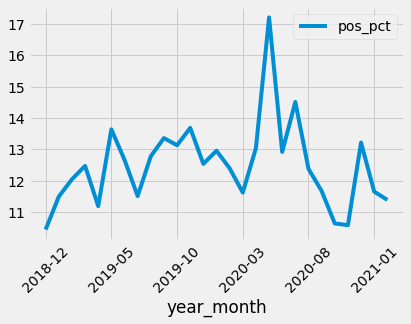

In [27]:
csat_pos_pct.plot.line('year_month',rot=45)

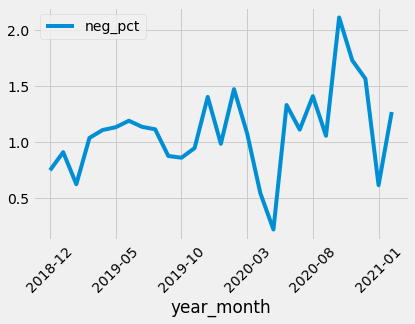

In [28]:
csat_neg_pct.plot.line('year_month',rot=45)

In [5]:
positive_new = csat_scores[csat_scores['sentiment'] == 1]
negative_new = csat_scores[csat_scores['sentiment'] == -1]
positive_new = positive_new.dropna()
negative_new = negative_new.dropna()


positive_new = positive_new['text'].to_list()
negative_new = negative_new['text'].to_list()
positive_tokens = list(map(str.split, positive_new))
negative_tokens = list(map(str.split, negative_new))


In [82]:
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"'))
    return final
df = csat_scores.dropna(subset=['text'])
df['text'] = df['text'].apply(remove_punctuation)
df = df[['text','sentiment']]
df.head()

C:\Users\Jimmy Reagan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,text,sentiment
0,I haven’t gotten a reply to my email I didn’t ...,-1
1,I just wish you were open sooner I had to wai...,1
2,I was rebooked a block away at no extra cost \...,1
3,Great service,1
4,Zahra from spothero was very nice and understo...,1


In [83]:
index = df.index
df['random_number'] = np.random.randn(len(index))

train = df[df['random_number'] <= 0.8]
test = df[df['random_number'] > 0.8]

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
train_matrix = vectorizer.fit_transform(train['text'])
test_matrix = vectorizer.transform(test['text'])

In [85]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

X_train = train_matrix
X_test = test_matrix
y_train = train['sentiment']
y_test = test['sentiment']

In [86]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [87]:
predictions = lr.predict(X_test)

C:\Users\Jimmy Reagan\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:326: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [88]:
from sklearn.metrics import confusion_matrix,classification_report
new = np.asarray(y_test)
confusion_matrix(predictions,y_test)

print(classification_report(predictions, y_test))

             precision    recall  f1-score   support

         -1       0.80      0.86      0.83      2232
          1       0.97      0.96      0.96     11152

avg / total       0.94      0.94      0.94     13384



In [6]:
print(positive_tokens[0])

['I', 'just', 'wish', 'you', 'were', 'open', 'sooner.', 'I', 'had', 'to', 'wait', 'and', 'wait', 'in', 'my', 'car', 'because', 'the', 'kiosk', 'did', 'not', 'have', 'the', 'options', 'I', 'need', 'to', 'use', 'my', 'code.', 'I', 'could', 'not', 'reach', 'anyone', 'for', 'help', 'until', 'after', '7am.']


In [7]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer

def lemmatize_sentence(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_sentence = []
    for word, tag in pos_tag(tokens):
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
        lemmatized_sentence.append(lemmatizer.lemmatize(word,pos))
    return lemmatized_sentence

print(lemmatize_sentence(positive_tokens[0]))

C:\Users\Jimmy Reagan\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\Jimmy Reagan\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:35: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.o

[nltk_data] Downloading package wordnet to C:\Users\Jimmy
[nltk_data]     Reagan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Jimmy Reagan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
['I', 'just', 'wish', 'you', 'be', 'open', 'sooner.', 'I', 'have', 'to', 'wait', 'and', 'wait', 'in', 'my', 'car', 'because', 'the', 'kiosk', 'do', 'not', 'have', 'the', 'option', 'I', 'need', 'to', 'use', 'my', 'code.', 'I', 'could', 'not', 'reach', 'anyone', 'for', 'help', 'until', 'after', '7am.']


In [8]:
import re, string
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

def remove_noise(tokens, stop_words = ()):
    cleaned_tokens = []
    
    for token, tag in pos_tag(tokens):
        token = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+#]|[!*\(\),]|'\
                       '(?:%[0-9a-fA-F][0-9a-fA-F]))+','', token)
        token = re.sub("(@[A-Za-z0-9_]+)","", token)
        
        if tag.startswith('NN'):
            pos = 'n'
        elif tag.startswith('VB'):
            pos = 'v'
        else:
            pos = 'a'
            
        lemmatizer = WordNetLemmatizer()
        token = lemmatizer.lemmatize(token,pos)
        
        if len(token) > 0 and token not in string.punctuation and token.lower() not in stop_words:
            cleaned_tokens.append(token.lower())
    return cleaned_tokens

print(remove_noise(positive_tokens[0], stop_words))

[nltk_data] Downloading package stopwords to C:\Users\Jimmy
[nltk_data]     Reagan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['wish', 'open', 'sooner.', 'wait', 'wait', 'car', 'kiosk', 'option', 'need', 'use', 'code.', 'could', 'reach', 'anyone', 'help', '7am.']


In [9]:
cleaned_positive_tokens = []
cleaned_negative_tokens = []
#stop_words = stopwords.words('english')

for tokens in positive_tokens:
    cleaned_positive_tokens.append(remove_noise(tokens, stop_words))
    
for tokens in negative_tokens:
    cleaned_negative_tokens.append(remove_noise(tokens, stop_words))
    
print(cleaned_positive_tokens[500])

['quick', 'easy', 'conversation.', 'nice', 'customer', 'service']


In [11]:
print(cleaned_positive_tokens[0])

['wish', 'open', 'sooner.', 'wait', 'wait', 'car', 'kiosk', 'option', 'need', 'use', 'code.', 'could', 'reach', 'anyone', 'help', '7am.']


In [12]:
def get_all_words(cleaned_tokens_list):
    for tokens in cleaned_tokens_list:
        for token in tokens:
            yield token

all_pos_words = get_all_words(cleaned_positive_tokens)
all_neg_words = get_all_words(cleaned_negative_tokens)

In [13]:
from nltk import FreqDist

freq_dist_pos = FreqDist(all_pos_words)
print(freq_dist_pos.most_common(10))

[('customer', 11873), ('service', 10158), ('spot', 8126), ('helpful', 7217), ('help', 6056), ('issue', 5958), ('parking', 5651), ('get', 5332), ('great', 5235), ('thank', 4801)]


In [18]:
def get_tweets_for_model(cleaned_tokens_list):
    for tweet_tokens in cleaned_tokens_list:
        yield dict([token, True] for token in tweet_tokens)

positive_tokens_for_model = get_tweets_for_model(cleaned_positive_tokens)
negative_tokens_for_model = get_tweets_for_model(cleaned_negative_tokens)

In [19]:
import random

positive_dataset = [(tweet_dict, "Positive")
                     for tweet_dict in positive_tokens_for_model]

negative_dataset = [(tweet_dict, "Negative")
                     for tweet_dict in negative_tokens_for_model]

dataset = positive_dataset + negative_dataset

random.shuffle(dataset)

train_data = dataset[:7000]
test_data = dataset[7000:]

In [20]:
from nltk import classify
from nltk import NaiveBayesClassifier
classifier = NaiveBayesClassifier.train(train_data)

print("Accuracy is:", classify.accuracy(classifier, test_data))

print(classifier.show_most_informative_features(10))

Accuracy is: 0.7489679263258178
Most Informative Features
                  nobody = True           Negati : Positi =     42.8 : 1.0
               basically = True           Negati : Positi =     33.9 : 1.0
               excellent = True           Positi : Negati =     30.4 : 1.0
                     $40 = True           Negati : Positi =     28.0 : 1.0
                     $20 = True           Negati : Positi =     27.4 : 1.0
                     $25 = True           Negati : Positi =     25.1 : 1.0
                   quick = True           Positi : Negati =     23.9 : 1.0
                 nothing = True           Negati : Positi =     23.7 : 1.0
            compensation = True           Negati : Positi =     22.1 : 1.0
                 nowhere = True           Negati : Positi =     22.1 : 1.0
None


In [22]:
print(classifier.show_most_informative_features(30))

Most Informative Features
                  nobody = True           Negati : Positi =     42.8 : 1.0
               basically = True           Negati : Positi =     33.9 : 1.0
               excellent = True           Positi : Negati =     30.4 : 1.0
                     $40 = True           Negati : Positi =     28.0 : 1.0
                     $20 = True           Negati : Positi =     27.4 : 1.0
                     $25 = True           Negati : Positi =     25.1 : 1.0
                   quick = True           Positi : Negati =     23.9 : 1.0
                 nothing = True           Negati : Positi =     23.7 : 1.0
            compensation = True           Negati : Positi =     22.1 : 1.0
                 nowhere = True           Negati : Positi =     22.1 : 1.0
                   promo = True           Negati : Positi =     20.3 : 1.0
                 manager = True           Negati : Positi =     20.3 : 1.0
                    deny = True           Negati : Positi =     19.2 : 1.0

In [26]:
negative_dataset[0]

({'haven’t': True,
  'get': True,
  'reply': True,
  'email!': True,
  'didn’t': True,
  'barcode': True,
  'garage': True,
  'say': True,
  'need.': True,
  'pay': True,
  'extra': True,
  '$17': True,
  'spothero': True,
  'spot.': True,
  'call': True,
  'customer': True,
  'service': True,
  'home': True,
  'ask': True,
  'email': True,
  'picture': True,
  'receipt': True,
  'refund': True,
  'credit.': True,
  'send': True,
  'back': True,
  'last': True,
  'week': True,
  'hear': True,
  'yet!': True},
 'Negative')